<a href="https://colab.research.google.com/github/nandikonda-vishal21/Machine-learning-projects/blob/main/IRIS_INTERN_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
iris = pd.read_csv('/content/Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.drop('Id', axis=1, inplace=True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


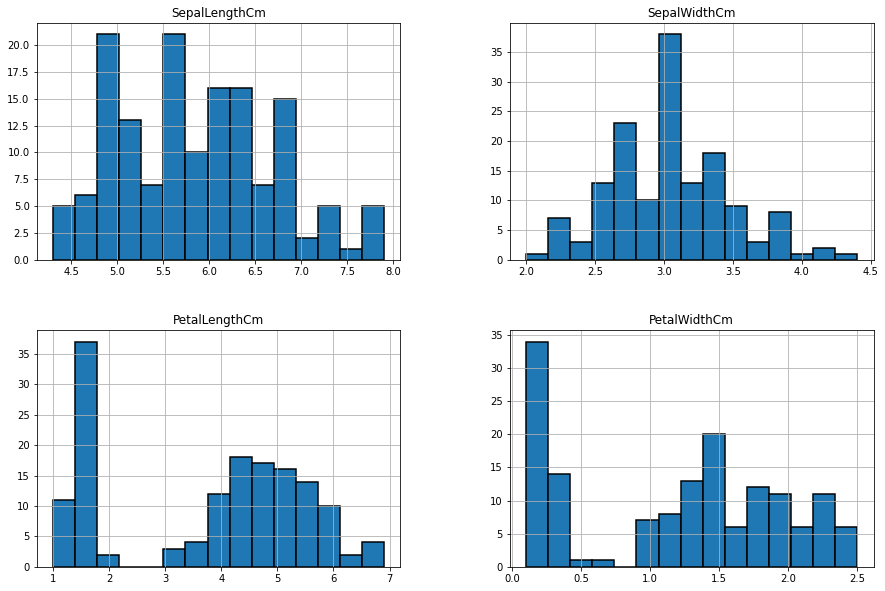

In [6]:
iris.hist(bins=15, edgecolor='black', linewidth=1.5, figsize=(15,10))
plt.show()

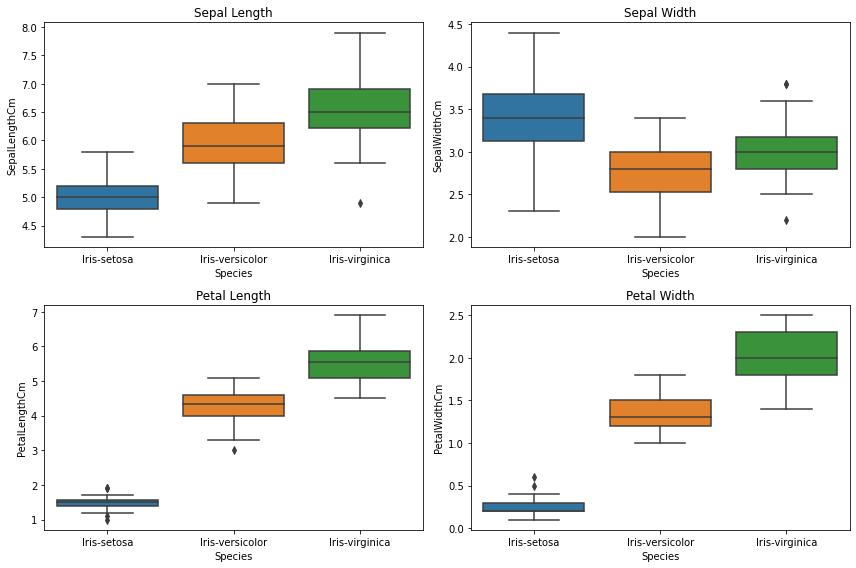

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="SepalLengthCm", x="Species", data=iris)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="SepalWidthCm", x="Species", data=iris)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x="Species", data=iris)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x="Species", data=iris)
plt.tight_layout()
plt.show()

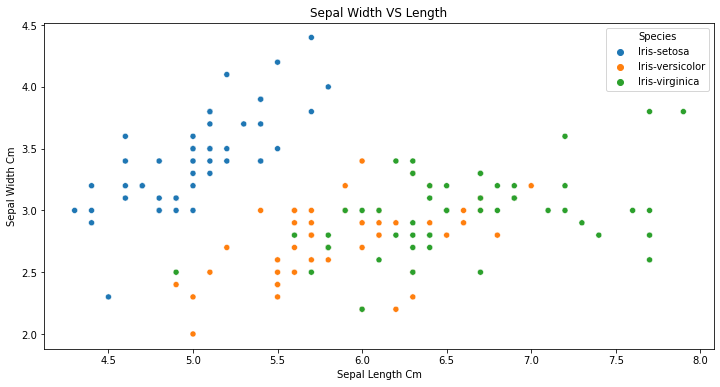

In [8]:
plt.figure(figsize=(12,6))
plt.title("Sepal Width VS Length")
sns.scatterplot(x=iris["SepalLengthCm"], y=iris["SepalWidthCm"], hue=iris["Species"])
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.show()

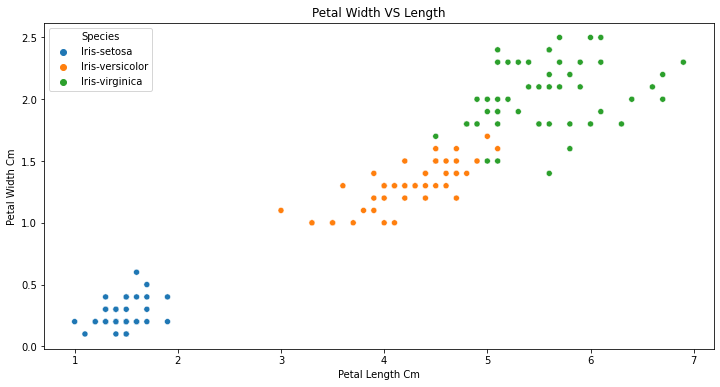

In [9]:
plt.figure(figsize=(12,6))
plt.title("Petal Width VS Length")
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], hue=iris["Species"])
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.show()

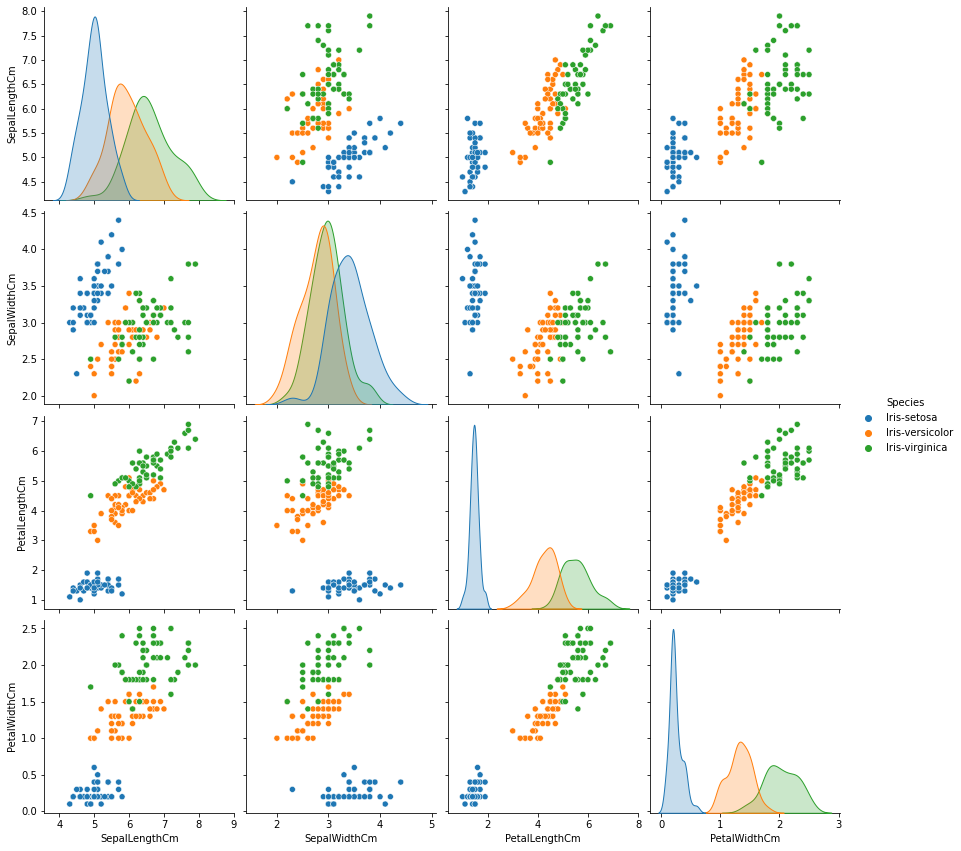

In [10]:
sns.pairplot(iris, hue="Species", height=3)
plt.show()

In [11]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


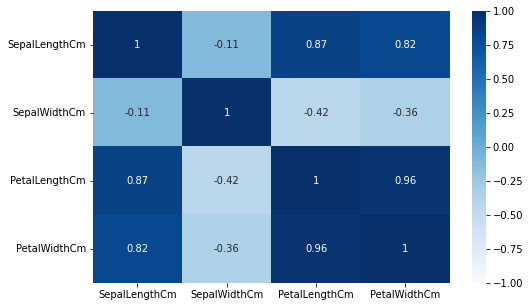

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(iris.corr(), cmap="Blues", vmin=-1, annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Spliting the iris dataset into it‘s attributes (X) and labels (y).
# drop() is making a copy of the data (if inplace = False)
X = iris.drop("Species", axis=1)
y = iris["Species"].copy()

# Spliting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test:  {X_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test:  (30, 4)


In [14]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardisation for better processing data
# Pipeline() enable transform data in right sequence. E.g. SimpleImputer() before StandardScaler()
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# ColumnTransformer() enable transform different type of columns 
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, X_train.columns)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
# X_test_prepared = full_pipeline.transform(X_test) # We wait until the end to use the test set
print(X_train_prepared[0])

[-0.24878147 -1.23261108  0.08960131 -0.1179144 ]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()

scores_log = cross_val_score(log_reg, X_train_prepared, y_train, cv=4, scoring="accuracy")

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores_log)

Scores: [0.96666667 1.         0.96666667 0.93333333]
Mean: 0.9666666666666668
Standard deviation: 0.02357022603955158


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_knn)

Scores: [0.93333333 0.9        0.96666667 0.96666667]
Mean: 0.9416666666666668
Standard deviation: 0.02763853991962833


In [18]:
from sklearn.svm import SVC

svm_clf = SVC()

scores_svm = cross_val_score(svm_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_svm)

Scores: [1.         1.         0.96666667 0.96666667]
Mean: 0.9833333333333334
Standard deviation: 0.016666666666666663


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

scores_tree = cross_val_score(tree_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_tree)

Scores: [0.96666667 1.         0.96666667 0.93333333]
Mean: 0.9666666666666668
Standard deviation: 0.02357022603955158


In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

scores_forest = cross_val_score(forest_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_forest)

Scores: [0.93333333 1.         0.96666667 0.93333333]
Mean: 0.9583333333333333
Standard deviation: 0.02763853991962833


In [21]:
from sklearn.model_selection import cross_val_predict

# Making a predictions to compare them with actual targets
pred_log = cross_val_predict(log_reg, X_train_prepared, y_train, cv=4)
pred_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=4)
pred_svm = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=4)
pred_tree = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)
pred_forest = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)

print(pred_log[:5])

[1 2 1 0 1]


In [22]:
labels = le.classes_
en_labels = le.transform(le.classes_)
for i, j in zip(labels, en_labels):
    print(i,":", j)

Iris-setosa : 0
Iris-versicolor : 1
Iris-virginica : 2


In [23]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix Logistic Regression \n{}".format(confusion_matrix(y_train, pred_log)))
print("Confusion Matrix KNN \n{}".format(confusion_matrix(y_train, pred_knn)))
print("Confusion Matrix SVM \n{}".format(confusion_matrix(y_train, pred_svm)))
print("Confusion Matrix Decision Tree \n{}".format(confusion_matrix(y_train, pred_tree)))
print("Confusion Matrix Random Forest \n{}".format(confusion_matrix(y_train, pred_forest)))

Confusion Matrix Logistic Regression 
[[40  0  0]
 [ 0 39  1]
 [ 0  3 37]]
Confusion Matrix KNN 
[[40  0  0]
 [ 0 38  2]
 [ 0  5 35]]
Confusion Matrix SVM 
[[40  0  0]
 [ 0 40  0]
 [ 0  2 38]]
Confusion Matrix Decision Tree 
[[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]
Confusion Matrix Random Forest 
[[40  0  0]
 [ 0 39  1]
 [ 0  3 37]]


In [24]:
X_train["RelLength"] = X_train["PetalLengthCm"] ** 3 / X_train["SepalLengthCm"] 
X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"] 
X_train["RelPetal"] = X_train["PetalWidthCm"] ** 3 / X_train["PetalLengthCm"] 

X_test["RelLength"] = X_test["PetalLengthCm"] ** 3 / X_test["SepalLengthCm"] 
X_test["RelWidth"] = X_test["PetalWidthCm"] ** 3 / X_test["SepalWidthCm"] 
X_test["RelPetal"] = X_test["PetalWidthCm"] ** 3 / X_test["PetalLengthCm"] 

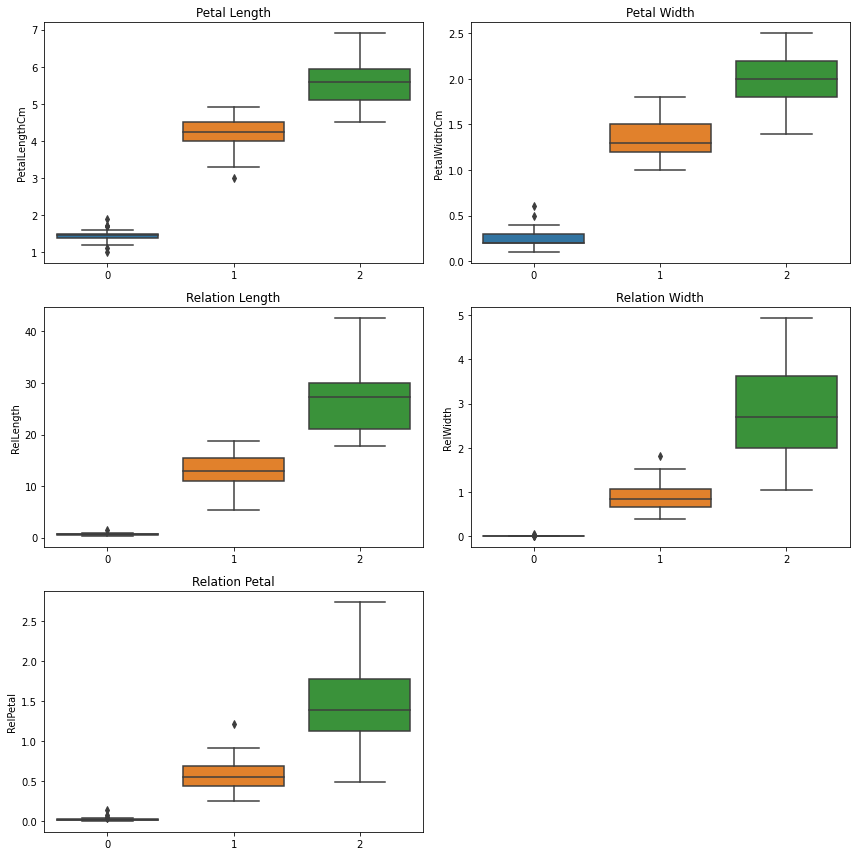

In [25]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x=y_train, data=X_train,)
plt.subplot(3,2,2)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x=y_train, data=X_train)
plt.subplot(3,2,3)
plt.title("Relation Length")
sns.boxplot(y="RelLength", x=y_train, data=X_train)
plt.subplot(3,2,4)
plt.title("Relation Width")
sns.boxplot(y="RelWidth", x=y_train, data=X_train)
plt.subplot(3,2,5)
plt.title("Relation Petal")
sns.boxplot(y="RelPetal", x=y_train, data=X_train)
plt.tight_layout()
plt.show()

In [26]:
X_train_new = X_train.copy()

full_pipeline_new = ColumnTransformer([
    ("num", num_pipeline, X_train_new.columns)
])

X_train_prepared_new = full_pipeline_new.fit_transform(X_train_new)
X_test_prepared_new = full_pipeline_new.transform(X_test)
print(X_train_prepared_new[0])

[-0.24878147 -1.23261108  0.08960131 -0.1179144  -0.24740094 -0.5274418
 -0.50264046]


In [27]:
print("Logistic Regression")
scores_log_fe = cross_val_score(log_reg, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_log_fe)
print("\nKNN")
scores_knn_fe = cross_val_score(knn_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_knn_fe)
print("\nSVM")
scores_svm_fe = cross_val_score(svm_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_svm_fe)
print("\nDecision Tree")
scores_tree_fe = cross_val_score(tree_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_tree_fe)
print("\nRandom Forest")
scores_forest_fe = cross_val_score(forest_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_forest_fe)

Logistic Regression
Scores: [0.96666667 1.         1.         0.96666667]
Mean: 0.9833333333333334
Standard deviation: 0.016666666666666663

KNN
Scores: [0.96666667 1.         1.         0.93333333]
Mean: 0.9750000000000001
Standard deviation: 0.02763853991962833

SVM
Scores: [0.96666667 1.         0.96666667 0.96666667]
Mean: 0.9750000000000001
Standard deviation: 0.01443375672974064

Decision Tree
Scores: [0.93333333 0.93333333 1.         0.93333333]
Mean: 0.95
Standard deviation: 0.02886751345948128

Random Forest
Scores: [0.93333333 1.         0.96666667 0.9       ]
Mean: 0.95
Standard deviation: 0.03726779962499649


In [28]:
from sklearn.model_selection import learning_curve

def learn_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=4, scoring='accuracy')    
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    # Print scores
    print('\n',"-" * 5, model, "-" * 5)
    print("Training Scores:")
    display_scores(train_scores_mean)    
    print("\nValidation Scores:")
    display_scores(val_scores_mean)

    # Plot learning curve    
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(model)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.legend()


 ----- LogisticRegression() -----
Training Scores:
Scores: [1.         1.         0.98979592 0.98913043 0.98333333]
Mean: 0.9924519372966578
Standard deviation: 0.006560217296566001

Validation Scores:
Scores: [0.80833333 0.925      0.925      0.95833333 0.98333333]
Mean: 0.9199999999999999
Standard deviation: 0.06


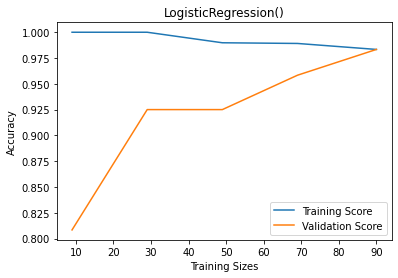

In [29]:
learn_curve(log_reg, X_train_prepared_new, y_train)


 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.88888889 0.98275862 0.97959184 0.98550725 0.97222222]
Mean: 0.9617937629824544
Standard deviation: 0.036721926451050824

Validation Scores:
Scores: [0.53333333 0.91666667 0.95833333 0.95833333 0.975     ]
Mean: 0.8683333333333334
Standard deviation: 0.168605390713873


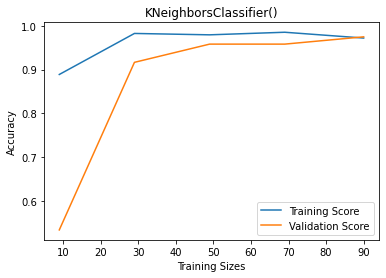

In [30]:
learn_curve(knn_clf, X_train_prepared_new, y_train)


 ----- SVC() -----
Training Scores:
Scores: [1.         1.         0.98979592 0.99275362 0.98333333]
Mean: 0.9931765749778172
Standard deviation: 0.00635004553483647

Validation Scores:
Scores: [0.76666667 0.925      0.95       0.95833333 0.975     ]
Mean: 0.9149999999999998
Standard deviation: 0.07590198357823798


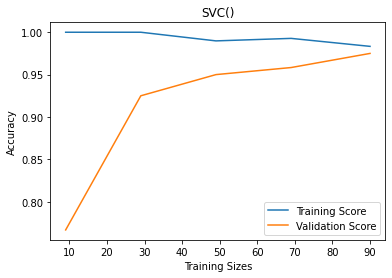

In [31]:
learn_curve(svm_clf, X_train_prepared_new, y_train)


 ----- DecisionTreeClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.73333333 0.925      0.95833333 0.95       0.95      ]
Mean: 0.9033333333333333
Standard deviation: 0.08573214099741124


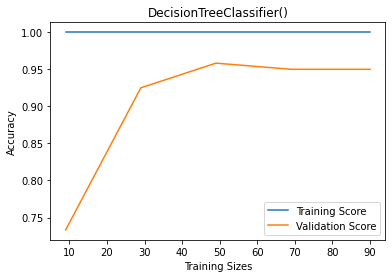

In [32]:
learn_curve(tree_clf, X_train_prepared_new, y_train)


 ----- RandomForestClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.88333333 0.94166667 0.95833333 0.96666667 0.95833333]
Mean: 0.9416666666666667
Standard deviation: 0.030276503540974945


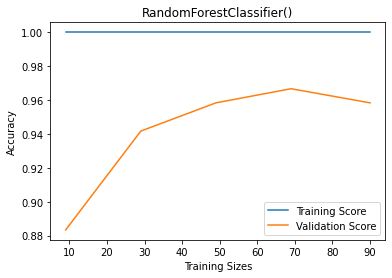

In [33]:
learn_curve(forest_clf, X_train_prepared_new, y_train)


 ----- LogisticRegression(C=1) -----
Training Scores:
Scores: [1.         1.         0.98979592 0.98913043 0.98333333]
Mean: 0.9924519372966578
Standard deviation: 0.006560217296566001

Validation Scores:
Scores: [0.80833333 0.925      0.925      0.95833333 0.98333333]
Mean: 0.9199999999999999
Standard deviation: 0.06

 ----- LogisticRegression() -----
Training Scores:
Scores: [1.         1.         0.98979592 0.98913043 0.98333333]
Mean: 0.9924519372966578
Standard deviation: 0.006560217296566001

Validation Scores:
Scores: [0.80833333 0.925      0.925      0.95833333 0.98333333]
Mean: 0.9199999999999999
Standard deviation: 0.06


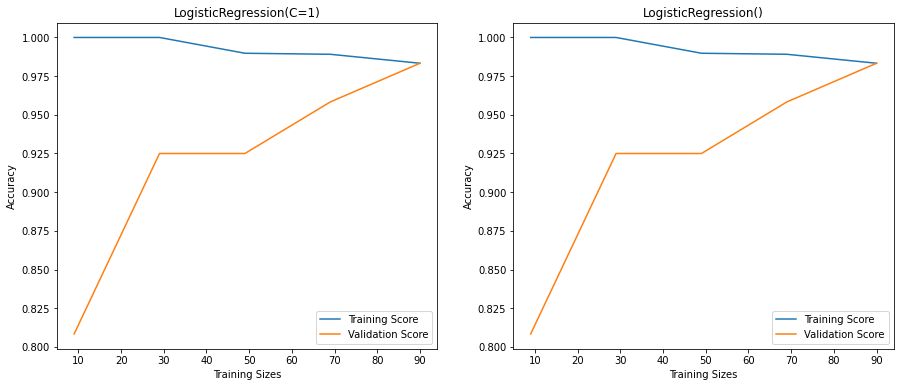

In [34]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_log = {
     'C': [0.1, 0.25 ,0.5 ,0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 6, 7],
     'multi_class': ['auto', 'ovr', 'multinomial']
}

grid_log = GridSearchCV(log_reg, param_grid_log, cv=4, scoring='accuracy')
grid_log.fit(X_train_prepared_new, y_train)

log_reg_new = grid_log.best_estimator_

plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
learn_curve(log_reg_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(log_reg, X_train_prepared_new, y_train)


 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.88888889 0.98275862 0.97959184 0.98550725 0.97222222]
Mean: 0.9617937629824544
Standard deviation: 0.036721926451050824

Validation Scores:
Scores: [0.53333333 0.91666667 0.95833333 0.95833333 0.975     ]
Mean: 0.8683333333333334
Standard deviation: 0.168605390713873

 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.88888889 0.98275862 0.97959184 0.98550725 0.97222222]
Mean: 0.9617937629824544
Standard deviation: 0.036721926451050824

Validation Scores:
Scores: [0.53333333 0.91666667 0.95833333 0.95833333 0.975     ]
Mean: 0.8683333333333334
Standard deviation: 0.168605390713873


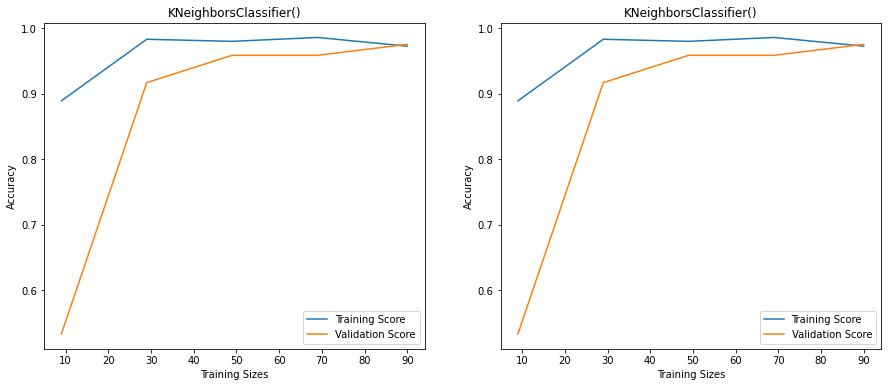

In [35]:
# KNN
param_grid_knn = {
    'n_neighbors': [5, 6, 7],
}

grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=4, scoring='accuracy')
grid_knn.fit(X_train_prepared_new, y_train)

knn_clf_new = grid_knn.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(knn_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(knn_clf, X_train_prepared_new, y_train)


 ----- SVC(C=1.2875) -----
Training Scores:
Scores: [1.         1.         0.98979592 0.99275362 0.98611111]
Mean: 0.9937321305333728
Standard deviation: 0.005533598380366394

Validation Scores:
Scores: [0.84166667 0.93333333 0.95833333 0.95833333 0.98333333]
Mean: 0.9349999999999999
Standard deviation: 0.04927248499698161

 ----- SVC() -----
Training Scores:
Scores: [1.         1.         0.98979592 0.99275362 0.98333333]
Mean: 0.9931765749778172
Standard deviation: 0.00635004553483647

Validation Scores:
Scores: [0.76666667 0.925      0.95       0.95833333 0.975     ]
Mean: 0.9149999999999998
Standard deviation: 0.07590198357823798


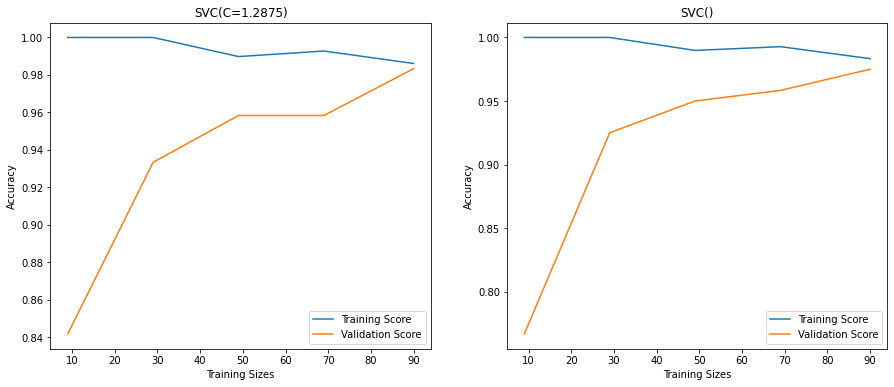

In [36]:
# SVC 
param_grid_svm = {
    'C': np.linspace(0.1, 2, 9),
    'gamma': ['scale', 'auto']    
}

grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=4, scoring='accuracy')
grid_svm.fit(X_train_prepared_new, y_train)

svm_clf_new = grid_svm.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(svm_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(svm_clf, X_train_prepared_new, y_train)


 ----- DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=7) -----
Training Scores:
Scores: [0.5        0.9137931  0.93367347 0.95289855 0.97777778]
Mean: 0.8556285802676893
Standard deviation: 0.17906852162390513

Validation Scores:
Scores: [0.33333333 0.89166667 0.94166667 0.89166667 0.95      ]
Mean: 0.8016666666666667
Standard deviation: 0.23543104675844642

 ----- DecisionTreeClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.775      0.93333333 0.94166667 0.94166667 0.96666667]
Mean: 0.9116666666666667
Standard deviation: 0.06924192692613668


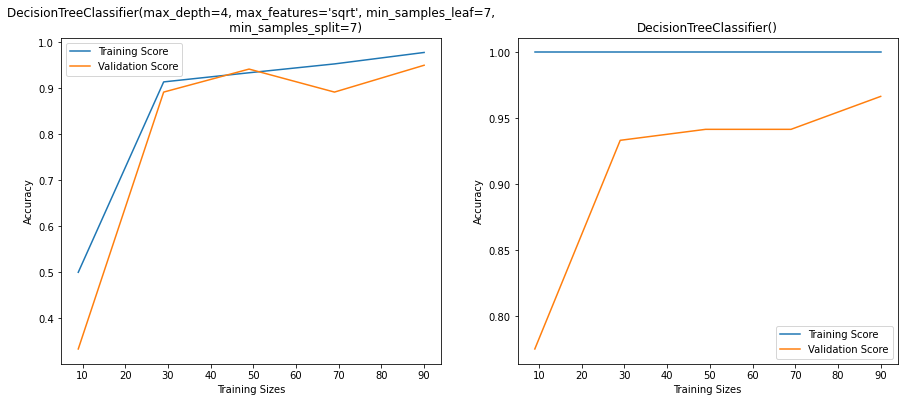

In [37]:
# Decision Tree
param_grid_tree = {
     'max_depth' : [4, 5, 6, 7, 8],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [4,5,6,7,8],
     'min_samples_split': [4, 5, 6, 7, 8]
}

grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=4, scoring='accuracy')
grid_tree.fit(X_train_prepared_new, y_train)

tree_clf_new = grid_tree.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(tree_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(tree_clf, X_train_prepared_new, y_train)


 ----- RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=4) -----
Training Scores:
Scores: [0.5        0.81034483 0.96938776 0.98188406 0.98333333]
Mean: 0.848989994798519
Standard deviation: 0.18627509266652753

Validation Scores:
Scores: [0.33333333 0.66666667 0.95       0.98333333 0.95833333]
Mean: 0.7783333333333334
Standard deviation: 0.2507544172647369

 ----- RandomForestClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.86666667 0.94166667 0.95833333 0.96666667 0.95833333]
Mean: 0.9383333333333332
Standard deviation: 0.03674234614174768


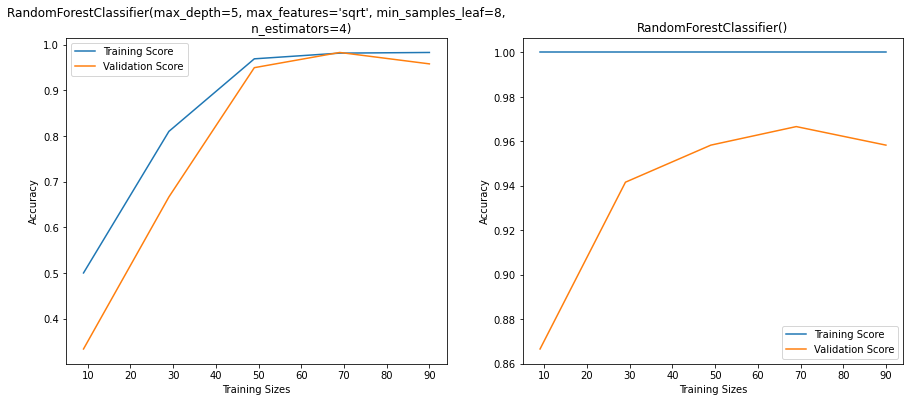

In [38]:
# Random Forest
param_grid_forest = {
     'n_estimators': [4, 5, 6],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [5, 6, 7, 8, 9],
     'max_depth' : [4, 5, 6]
}

grid_forest = GridSearchCV(forest_clf, param_grid_forest, cv=4, scoring='accuracy')
grid_forest.fit(X_train_prepared_new, y_train)

forest_clf_new = grid_forest.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(forest_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(forest_clf, X_train_prepared_new, y_train)

In [39]:
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': log_reg_new,
    'KNN': knn_clf_new,
    'SVC': svm_clf_new,
    'Decision Tree': tree_clf_new,
    'Random Forest': forest_clf_new
}

def test_scores(model, X_train, X_test, y_train, y_test):
    for name, variable in model.items():
        variable.fit(X_train, y_train)
        y_pred = variable.predict(X_test)
        print(f'The accuracy of the {name} is {accuracy_score(y_test, y_pred) * 100 :.2f} %.')
        
        
test_scores(models, X_train_prepared_new, X_test_prepared_new, y_train, y_test)

The accuracy of the Logistic Regression is 93.33 %.
The accuracy of the KNN is 96.67 %.
The accuracy of the SVC is 93.33 %.
The accuracy of the Decision Tree is 96.67 %.
The accuracy of the Random Forest is 93.33 %.
